In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline                                     

In [2]:
data=pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [3]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
data.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [10]:
data=data.drop('veil-type',axis=1)

In [11]:
Features=data.columns

In [12]:
Features

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
le=LabelEncoder()
for col in data.columns: 
    data[col]=le.fit_transform(data[col])

In [14]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
data = scaler.fit_transform(data)
data=pd.DataFrame(data,columns=Features)

In [16]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


In [17]:
data['class'].value_counts()

0.0    4208
1.0    3916
Name: class, dtype: int64

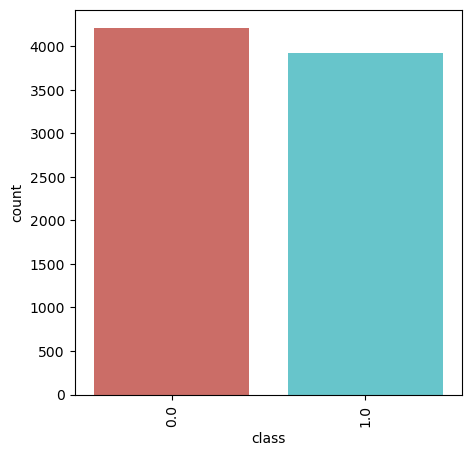

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='class',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

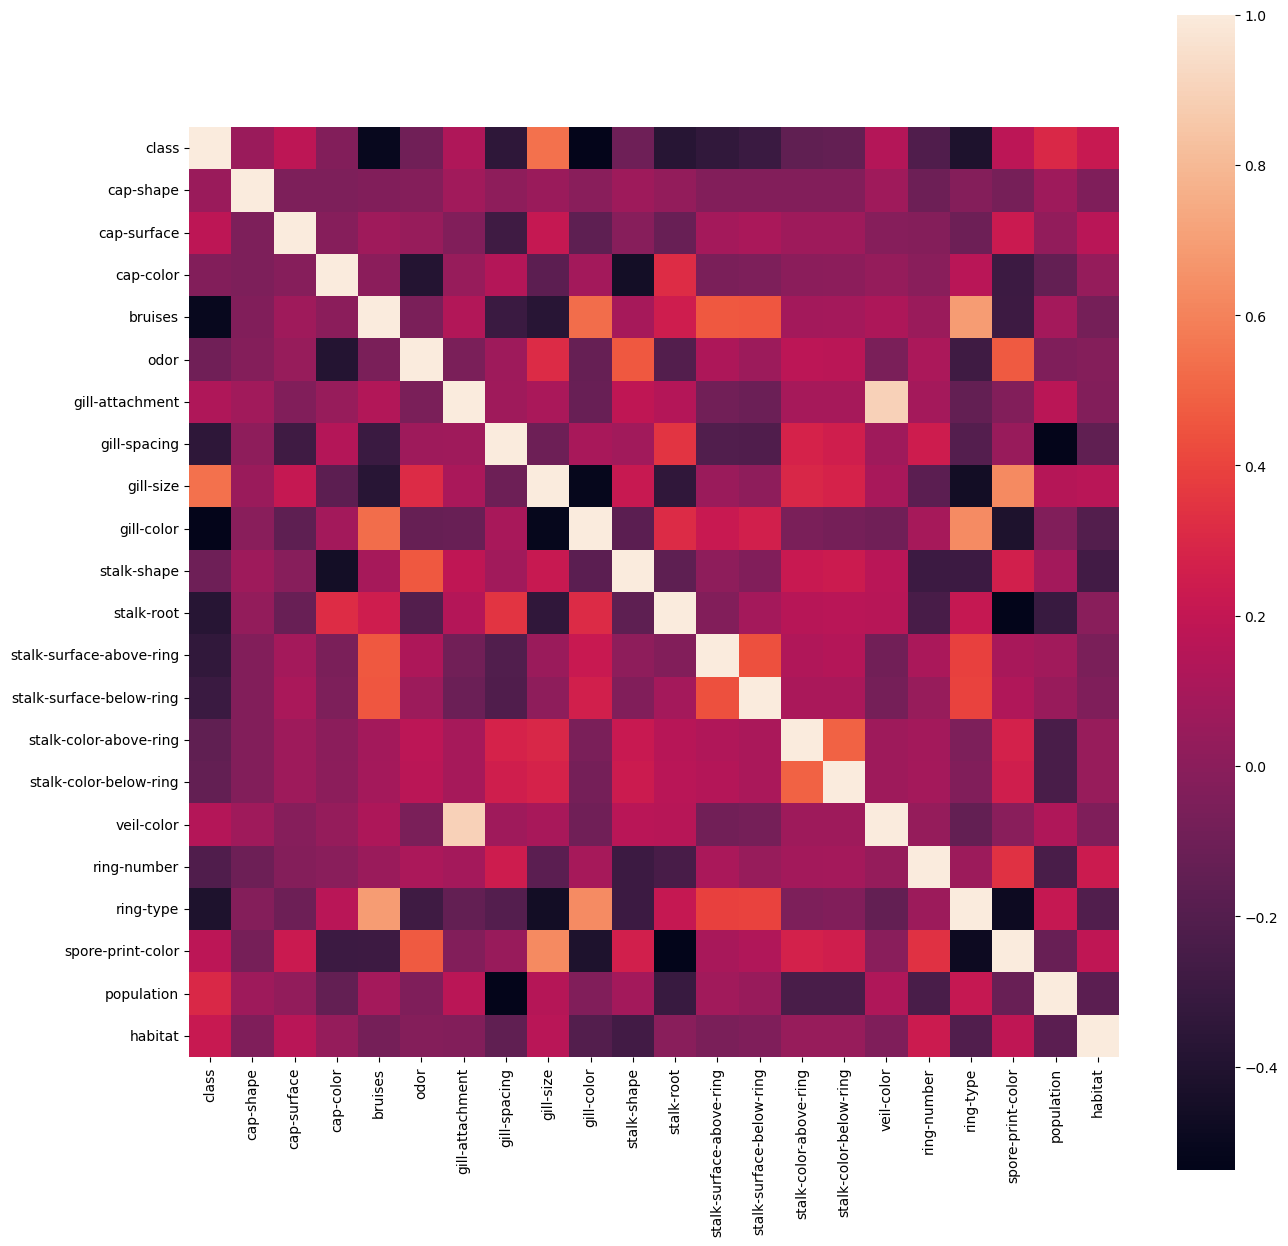

In [19]:
Correlation=data.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(Correlation,square=True)

In [20]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [21]:
# from dataprep.eda import create_report
# report = create_report(data)
# report.show_browser() # show report in the browser

In [22]:
# report

In [23]:
x=data.drop('class',axis=1)

In [24]:
x.shape

(8124, 21)

In [25]:
features=x.columns

In [26]:
features

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [27]:
y=data['class']
y.shape

(8124,)

In [28]:
transformer = GenericUnivariateSelect(score_func= chi2, mode= 'k_best', param=10)
X = transformer.fit_transform(x, y)
feature_idx =transformer.get_support(indices=True)
feature_name = x.columns[feature_idx] 

In [29]:
X.shape

(8124, 10)

In [30]:
feature_name

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-type', 'habitat'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True, random_state=42)

In [32]:
X_train.shape

(5443, 10)

In [33]:
name=[]
score=[]

In [34]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=50,max_depth=3,random_state=33) #criterion can be also : entropy
name.append("RandomForestClassifierModel")
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
score.append(RandomForestClassifierModel.score(X_test, y_test))
 
print('----------------------------------------------------')

#Calculating Prediction
# y_pred = RandomForestClassifierModel.predict(X_test)
# y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
#print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9533345581480801
RandomForestClassifierModel Test Score is :  0.949272659455427
----------------------------------------------------


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=33)
name.append("GradientBoostingClassifierModel")
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
score.append(GBCModel.score(X_test, y_test))
print('----------------------------------------------------')

GBCModel Train Score is :  0.9902627227631821
GBCModel Test Score is :  0.990675121223424
----------------------------------------------------


In [36]:
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
name.append("GaussianNBModel")
GaussianNBModel.fit(X_train, y_train)
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))
score.append(GaussianNBModel.score(X_test, y_test))
print('----------------------------------------------------')

GaussianNBModel Train Score is :  0.8952783391512034
GaussianNBModel Test Score is :  0.8903394255874674
----------------------------------------------------


In [37]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
name.append("LogisticRegressionModel")
LogisticRegressionModel.fit(X_train, y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
score.append(LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.9366158368546758
LogisticRegressionModel Test Score is :  0.9392017903767251
LogisticRegressionModel Classes are :  [0. 1.]
----------------------------------------------------


In [38]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
name.append("SGDClassifierModel")
SGDClassifierModel.fit(X_train, y_train)
#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
score.append(SGDClassifierModel.score(X_test, y_test))
print('SGDClassifierModel loss function is : ' , SGDClassifierModel.loss_function_)
print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)
print('----------------------------------------------------')

SGDClassifierModel Train Score is :  0.9254087819217344
SGDClassifierModel Test Score is :  0.9291309212980231
SGDClassifierModel loss function is :  <sklearn.linear_model._sgd_fast.SquaredLoss object at 0x7fb42c17ee90>
SGDClassifierModel No. of iteratios is :  47
----------------------------------------------------


In [39]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
name.append("DecisionTreeClassifierModel")
DecisionTreeClassifierModel.fit(X_train, y_train)
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
score.append(DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('----------------------------------------------------')

DecisionTreeClassifierModel Train Score is :  0.9401065588829689
DecisionTreeClassifierModel Test Score is :  0.9425587467362925
DecisionTreeClassifierModel Classes are :  [0. 1.]
----------------------------------------------------


In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
name.append("KNNClassifierModel")
KNNClassifierModel.fit(X_train, y_train)
#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
score.append(KNNClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

KNNClassifierModel Train Score is :  0.9996325555759691
KNNClassifierModel Test Score is :  0.9992540096978739
----------------------------------------------------


In [41]:
Model=pd.DataFrame (name,columns = ['Model'])   
Test_Accuracy=pd.DataFrame (score,columns = ['Test_Accuracy'])   

In [42]:
pd.concat([Model,Test_Accuracy],axis=1)

,Model,Test_Accuracy
0,RandomForestClassifierModel,0.949273
1,GradientBoostingClassifierModel,0.990675
2,GaussianNBModel,0.890339
3,LogisticRegressionModel,0.939202
4,SGDClassifierModel,0.929131
5,DecisionTreeClassifierModel,0.942559
6,KNNClassifierModel,0.999254


# Using GradientBoostingClassifierModel

In [43]:
y_pred = GBCModel.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.990675121223424


In [45]:
from sklearn.metrics import classification_report
#----------------------------------------------------
# Calculating classification Report :  
classification_report(y_test, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :\n ', ClassificationReport )

Classification Report is :
                precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1378
         1.0       1.00      0.98      0.99      1303

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



In [46]:
 
#Calculating Zero One Loss:  
Z_O_l_N=zero_one_loss(y_test, y_pred, normalize = True, sample_weight = None)          
print('Zero One Loss Value (these  are the percentage of False value) : ', Z_O_l_N )
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")


Z_O_L_perc = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value(these are the number of False value) : ', Z_O_L_perc )

Zero One Loss Value (these  are the percentage of False value) :  0.009324878776575951
-----------------------------------------------------------
-----------------------------------------------------------
Zero One Loss Value(these are the number of False value) :  25


Confusion Matrix is : 
 [[1376    2]
 [  23 1280]]


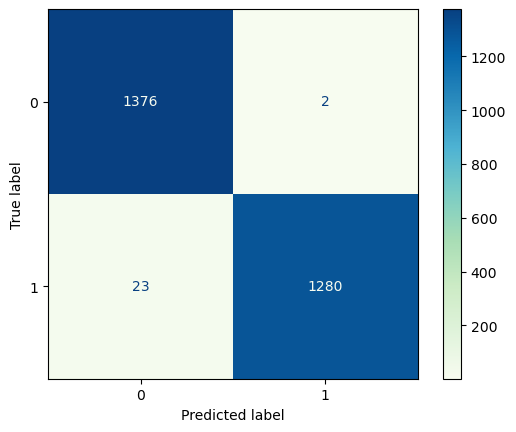

In [47]:
 
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
disp = plot_confusion_matrix(GBCModel, X_test, y_test,display_labels=[0,1],cmap=plt.cm.GnBu,values_format='g')
                           

In [48]:
Data=pd.DataFrame(y_pred,columns=["predicted"])
Data['Actual']=y_test.values

In [49]:
Data.head(20)

,predicted,Actual
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,0.0,0.0
